In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre

random=default_rng(42)
# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



In [2]:
import os
import tarfile
import urllib.request
from pathlib import Path
import pathlib
print(pathlib.Path().resolve(), " put all the cloned files in the same folder")

# General data
general_data = pd.read_csv('general_data.csv',dtype={'EmployeeID': object})
# survey data 
manager_survey_data = pd.read_csv('manager_survey_data.csv',dtype={'EmployeeID': object})
employee_survey_data = pd.read_csv('employee_survey_data.csv',dtype={'EmployeeID': object})
# office entry/exit time
in_time = pd.read_csv('in_time.csv',dtype={'EmployeeID': object})
out_time = pd.read_csv('out_time.csv',dtype={'EmployeeID': object})

#print(general_data.describe())


C:\Users\lyder\Desktop\CESI\FISE A4 INFO\BLOC AI\Projet\blocAI  put all the cloned files in the same folder


In [3]:
print("general_data:", general_data.shape)
print("employee_survey:", employee_survey_data.shape)
print("manager_survey:", manager_survey_data.shape)

general_data: (4410, 24)
employee_survey: (4410, 4)
manager_survey: (4410, 3)


In [4]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [6]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [7]:
general_data.set_index('EmployeeID',inplace=True)
employee_survey_data.set_index('EmployeeID',inplace=True)
manager_survey_data.set_index('EmployeeID',inplace=True)

In [8]:
Employee = pd.concat([general_data, employee_survey_data, manager_survey_data],axis =1)
Employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [9]:
"Check unique values in every columns and delete them because not useful."

'Check unique values in every columns and delete them because not useful.'

In [10]:
Employee.T.apply(lambda columns: columns.nunique(),axis=1)

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
JobInvolvement                4
PerformanceRating             2
dtype: int64

In [11]:
#Delete columns EmployeeCount, Over18 and StandardHours because they bring nothing.


In [12]:
Employee.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [13]:
Employee.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
Employee['BusinessTravel'] = labelEncoder_X.fit_transform(Employee['BusinessTravel'])
Employee['Department'] = labelEncoder_X.fit_transform(Employee['Department'])
Employee['EducationField'] = labelEncoder_X.fit_transform(Employee['EducationField'])
Employee['Gender'] = labelEncoder_X.fit_transform(Employee['Gender'])
Employee['JobRole'] = labelEncoder_X.fit_transform(Employee['JobRole'])
Employee['MaritalStatus'] = labelEncoder_X.fit_transform(Employee['MaritalStatus'])
Employee['Attrition'] = labelEncoder_X.fit_transform(Employee['Attrition'])

In [15]:
Employee.dtypes

Age                          int64
Attrition                    int32
BusinessTravel               int32
Department                   int32
DistanceFromHome             int64
Education                    int64
EducationField               int32
Gender                       int32
JobLevel                     int64
JobRole                      int32
MaritalStatus                int32
MonthlyIncome                int64
NumCompaniesWorked         float64
PercentSalaryHike            int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

In [16]:
#Check for null values

In [17]:
Employee.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
PercentSalaryHike          False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
JobInvolvement             False
PerformanceRating          False
dtype: bool

In [18]:
#As we see above, some columns have null values, we need to replac it by the mean of its column.

In [19]:
meanOfNumCompaniesWorked = Employee["NumCompaniesWorked"].astype('float').mean(axis = 0 )
Employee["NumCompaniesWorked"].replace(np.nan,meanOfNumCompaniesWorked,inplace = True)

meanOfTotalWorkingYears = Employee["TotalWorkingYears"].astype('float').mean(axis = 0 )
Employee["TotalWorkingYears"].replace(np.nan,meanOfTotalWorkingYears,inplace = True)

meanOfEnvironmentSatisfaction = round(Employee["EnvironmentSatisfaction"].astype('float').mean(axis = 0 ))
Employee["EnvironmentSatisfaction"].replace(np.nan,meanOfEnvironmentSatisfaction,inplace = True)

meanOfJobSatisfaction = round(Employee["JobSatisfaction"].astype('float').mean(axis = 0 ))
Employee["JobSatisfaction"].replace(np.nan,meanOfJobSatisfaction,inplace = True)

meanOfWorkLifeBalance = round(Employee["WorkLifeBalance"].astype('float').mean(axis = 0 ))
Employee["WorkLifeBalance"].replace(np.nan,meanOfWorkLifeBalance,inplace = True)

In [20]:
Employee.isnull().any()

Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked         False
PercentSalaryHike          False
StockOptionLevel           False
TotalWorkingYears          False
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
EnvironmentSatisfaction    False
JobSatisfaction            False
WorkLifeBalance            False
JobInvolvement             False
PerformanceRating          False
dtype: bool

In [21]:
Employee.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,
1,51,0,2,2,6,2,1,0,1,0,1,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
2,31,1,1,1,10,1,1,0,1,6,2,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
3,32,0,1,1,17,4,4,1,4,7,1,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
4,38,0,0,1,2,5,1,1,3,1,1,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
5,32,0,2,1,10,1,3,1,1,7,2,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [22]:
#Handle the other datasets ' in & out time'

In [23]:
import datetime as dt
print("in_time:", in_time.shape)
in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
in_time.set_index('EmployeeID', inplace=True)
in_time.head()

in_time: (4410, 262)


,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,NaN,2015-01-15 10:01:24,2015-01-16 10:19:08,NaN,2015-01-20 09:50:34,2015-01-21 09:49:42,2015-01-22 09:47:45,2015-01-23 09:23:44,NaN,2015-01-27 09:50:37,2015-01-28 09:56:13,2015-01-29 09:53:47,2015-01-30 10:09:26,2015-02-02 09:38:43,2015-02-03 10:23:38,2015-02-04 09:48:37,2015-02-05 09:52:36,2015-02-06 09:53:23,2015-02-09 10:01:45,2015-02-10 10:14:18,2015-02-11 10:18:44,2015-02-12 10:10:35,2015-02-13 09:13:07,2015-02-16 10:14:02,2015-02-17 10:03:08,2015-02-18 10:23:06,NaN,2015-02-20 09:54:56,2015-02-23 09:46:59,2015-02-24 10:11:18,2015-02-25 09:52:36,2015-02-26 09:56:33,2015-02-27 09:58:46,2015-03-02 10:19:43,2015-03-03 10:08:37,2015-03-04 10:05:38,NaN,2015-03-06 09:55:53,2015-03-09

In [24]:
print("out_time:",in_time.shape)
out_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
out_time.set_index('EmployeeID', inplace=True)
out_time.head()

out_time: (4410, 261)


,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,NaN,2015-01-15 17:22:13,2015-01-16 17:35:11,NaN,2015-01-20 16:37:07,2015-01-21 16:55:24,2015-01-22 16:50:47,2015-01-23 17:00:01,NaN,2015-01-27 17:28:22,2015-01-28 17:03:21,2015-01-29 17:18:36,2015-01-30 17:00:25,2015-02-02 16:32:49,2015-02-03 17:35:49,2015-02-04 17:24:56,2015-02-05 17:26:31,2015-02-06 17:21:35,2015-02-09 17:37:50,2015-02-10 17:30:20,2015-02-11 17:30:19,2015-02-12 17:36:42,2015-02-13 16:25:26,2015-02-16 17:50:23,2015-02-17 17:28:06,2015-02-18 18:13:29,NaN,2015-02-20 17:44:52,2015-02-23 17:13:27,2015-02-24 17:24:48,2015-02-25 17:27:37,2015-02-26 17:08:36,2015-02-27 17:21:55,2015-03-02 17:29:08,2015-03-03 16:54:12,2015-03-04 17:50:18,NaN,2015-03-06 17:44:47,2015-03-09

In [41]:

in_time_stamp = in_time.apply(pd.to_datetime) #converting into timestamp object
out_time_stamp = out_time.apply(pd.to_datetime)
df_working_hours = (out_time_stamp - in_time_stamp)# time spent in the company
df_working_hours.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,2015-01-21,2015-01-22,2015-01-23,2015-01-26,2015-01-27,2015-01-28,2015-01-29,2015-01-30,2015-02-02,2015-02-03,2015-02-04,2015-02-05,2015-02-06,2015-02-09,2015-02-10,2015-02-11,2015-02-12,2015-02-13,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-23,2015-02-24,2015-02-25,2015-02-26,2015-02-27,2015-03-02,2015-03-03,2015-03-04,2015-03-05,2015-03-06,2015-03-09,2015-03-10,2015-03-11,2015-03-12,2015-03-13,2015-03-16,2015-03-17,2015-03-18,2015-03-19,2015-03-20,2015-03-23,2015-03-24,2015-03-25,2015-03-26,2015-03-27,2015-03-30,2015-03-31,2015-04-01,2015-04-02,2015-04-03,2015-04-06,2015-04-07,2015-04-08,2015-04-09,2015-04-10,2015-04-13,2015-04-14,2015-04-15,2015-04-16,2015-04-17,2015-04-20,2015-04-21,2015-04-22,2015-04-23,2015-04-24,2015-04-27,2015-04-28,2015-04-29,2015-04-30,2015-05-01,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-11,2015-05-12,2015-05-13,2015-05-14,2015-05-15,2015-05-18,2015-05-19,2015-05-20,2015-05-21,2015-05-22,2015-05-25,2015-05-26,2015-05-27,2015-05-28,2015-05-29,2015-06-01,2015-06-02,2015-06-03,2015-06-04,2015-06-05,2015-06-08,2015-06-09,2015-06-10,2015-06-11,2015-06-12,2015-06-15,2015-06-16,2015-06-17,2015-06-18,2015-06-19,2015-06-22,2015-06-23,2015-06-24,2015-06-25,2015-06-26,2015-06-29,2015-06-30,2015-07-01,2015-07-02,2015-07-03,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-17,2015-08-18,2015-08-19,2015-08-20,2015-08-21,2015-08-24,2015-08-25,2015-08-26,2015-08-27,2015-08-28,2015-08-31,2015-09-01,2015-09-02,2015-09-03,2015-09-04,2015-09-07,2015-09-08,2015-09-09,2015-09-10,2015-09-11,2015-09-14,2015-09-15,2015-09-16,2015-09-17,2015-09-18,2015-09-21,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-28,2015-09-29,2015-09-30,2015-10-01,2015-10-02,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-12,2015-10-13,2015-10-14,2015-10-15,2015-10-16,2015-10-19,2015-10-20,2015-10-21,2015-10-22,2015-10-23,2015-10-26,2015-10-27,2015-10-28,2015-10-29,2015-10-30,2015-11-02,2015-11-03,2015-11-04,2015-11-05,2015-11-06,2015-11-09,2015-11-10,2015-11-11,2015-11-12,2015-11-13,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-23,2015-11-24,2015-11-25,2015-11-26,2015-11-27,2015-11-30,2015-12-01,2015-12-02,2015-12-03,2015-12-04,2015-12-07,2015-12-08,2015-12-09,2015-12-10,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaT,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,NaT,0 days 07:20:49,0 days 07:16:03,NaT,0 days 06:46:33,0 days 07:05:42,0 days 07:03:02,0 days 07:36:17,NaT,0 days 07:37:45,0 days 07:07:08,0 days 07:24:49,0 days 06:50:59,0 days 06:54:06,0 days 07:12:11,0 days 07:36:19,0 days 07:33:55,0 days 07:28:12,0 days 07:36:05,0 days 07:16:02,0 days 07:11:35,0 days 07:26:07,0 days 07:12:19,0 days 07:36:21,0 days 07:24:58,0 days 07:50:23,NaT,0 days 07:49:56,0 days 07:26:28,0 days 07:13:30,0 days 07:35:01,0 days 07:12:03,0 days 07:23:09,0 days 07:09:25,0 days 06:45:35,0 days 07:44:40,NaT,0 days 07:48:54,0 days 07:24:31,0 days 06:55:23,0 days 07:09:40,0 days 07:04:48,0 days 07:18:37,NaT,0 days 06:54:54,0 days 07:11:52,0 days 07:50:52,0 days 07:09:45,0 days 07:36:59,0 days 07:

In [70]:
df_working_time= df_working_hours / np.timedelta64(1, 'h') #converting time spent to float value

mean_working_hours = df_working_time.mean(axis=1)# mean time spend in company in above period
Employee['MeanWorkingHours'] = mean_working_hours.values
general_data['MeanWorkingHours'] = mean_working_hours.values #** adding to the dataframe
print(Employee['MeanWorkingHours'])


EmployeeID
1       7.373651
2       7.718969
3       7.013240
4       7.193678
5       8.006175
          ...   
4406    8.522277
4407    6.092954
4408    7.706632
4409    9.492595
4410    6.988948
Name: MeanWorkingHours, Length: 4410, dtype: float64


In [71]:
import calendar

In [74]:
in_time_stamp.head()
week_day = in_time_stamp.dropna(how='all', axis=1) # drop columns with every value as NaT as they are public holidays
week_day.head()
col_list =list( week_day.columns)#converting columns to list
df_col_list = pd.DataFrame(col_list)#coverting list to pandas dataframe
df_col_list_stamp = df_col_list.apply(pd.to_datetime)#convert df to datetime object
df_col_list_stamp[0] = df_col_list_stamp[0].dt.weekday # df to day of week 0 for monday and 6 for sunday
weekday_list=list(df_col_list_stamp[0])# creating list of weekdays for renaming columns
week_day.columns = [weekday_list]#renaming columns
Employee['TotalLeave']=week_day.isna().sum(axis=1).values#Adding total leaves to the employee dataframe
general_data['TotalLeave']=week_day.isna().sum(axis=1).values
Employee['LeaveMonFri']=week_day[[0,4]].isna().sum(axis=1).values # leave on monday and friday
general_data['LeaveMonFri']=week_day[[0,4]].isna().sum(axis=1).values

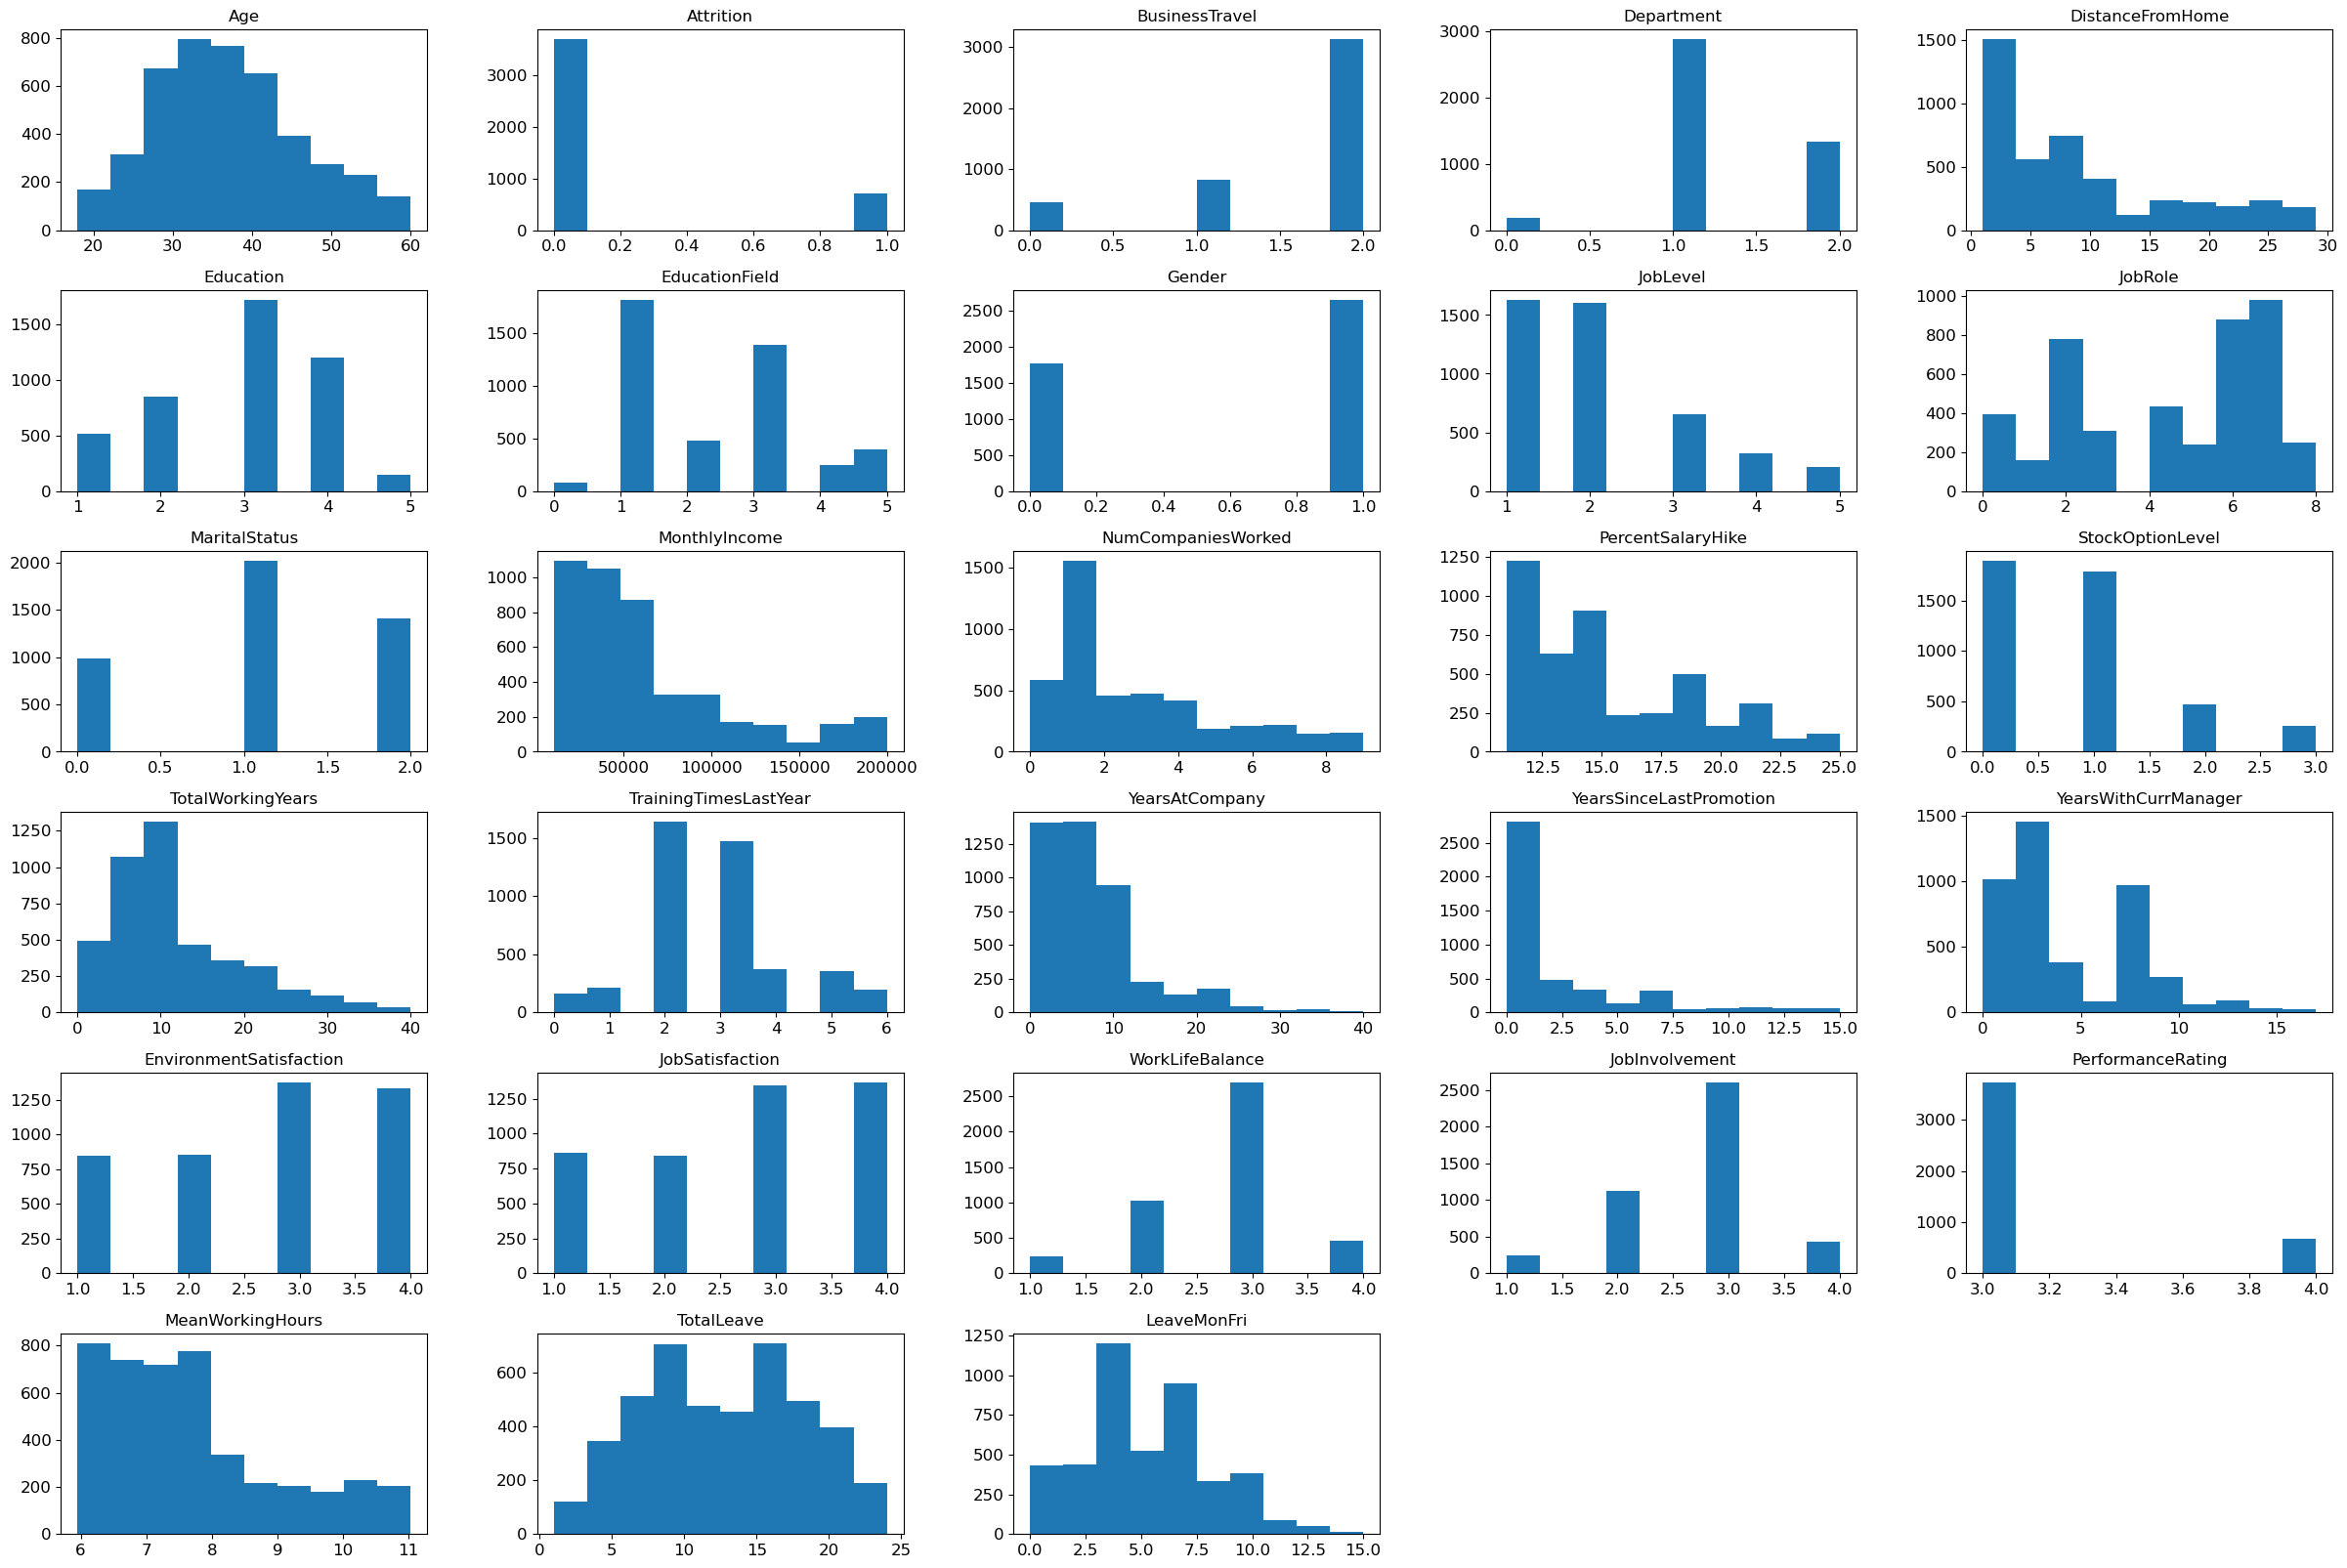

In [75]:
Employee.hist(figsize=(30,20),grid = False);

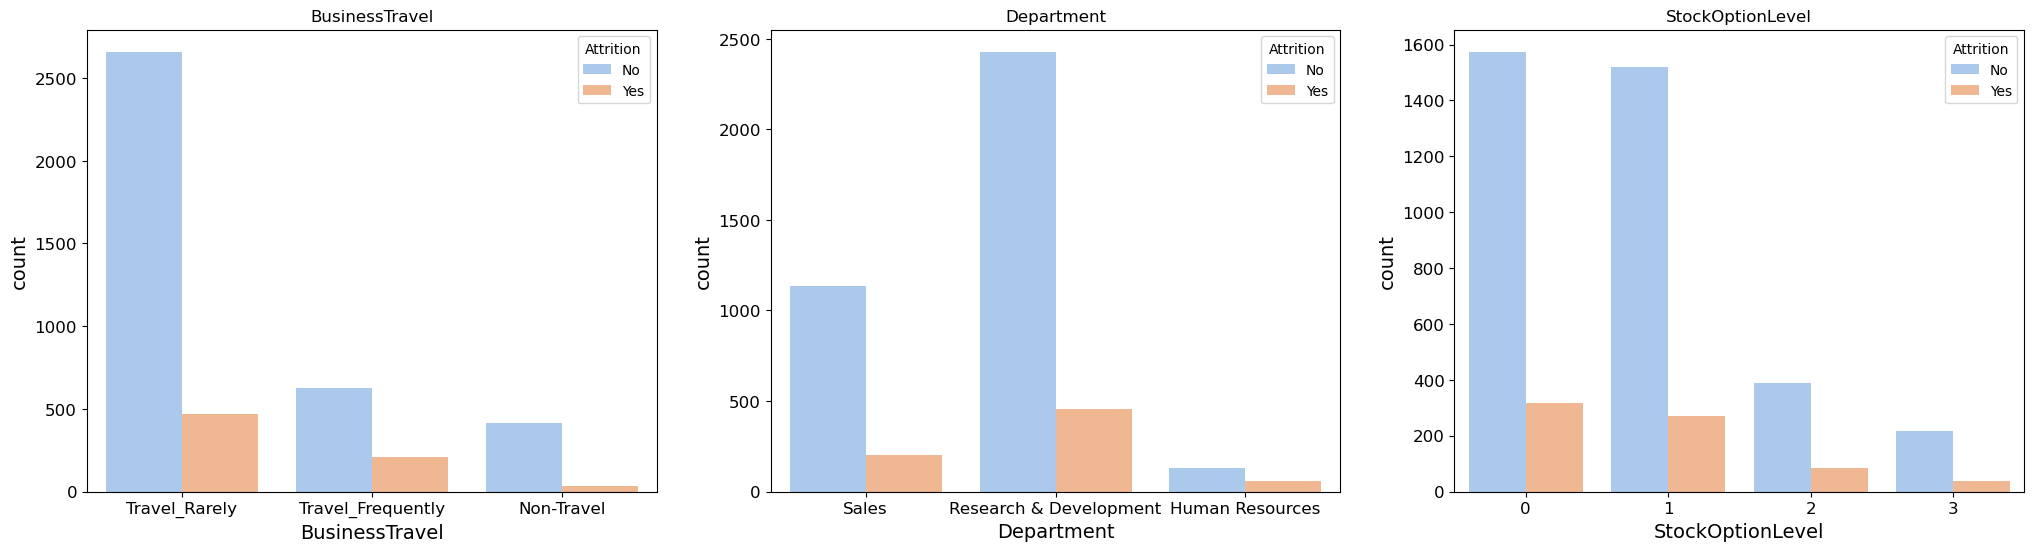

In [77]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.countplot(x='BusinessTravel', hue='Attrition', data=general_data, palette='pastel');
plt.title('BusinessTravel')

plt.subplot(1,3,2)
sns.countplot(x='Department', hue='Attrition', data=general_data, palette='pastel');
plt.title('Department')

plt.subplot(1,3,3)
sns.countplot(x='StockOptionLevel', hue='Attrition', data=general_data, palette='pastel');
plt.title('StockOptionLevel')

plt.show()

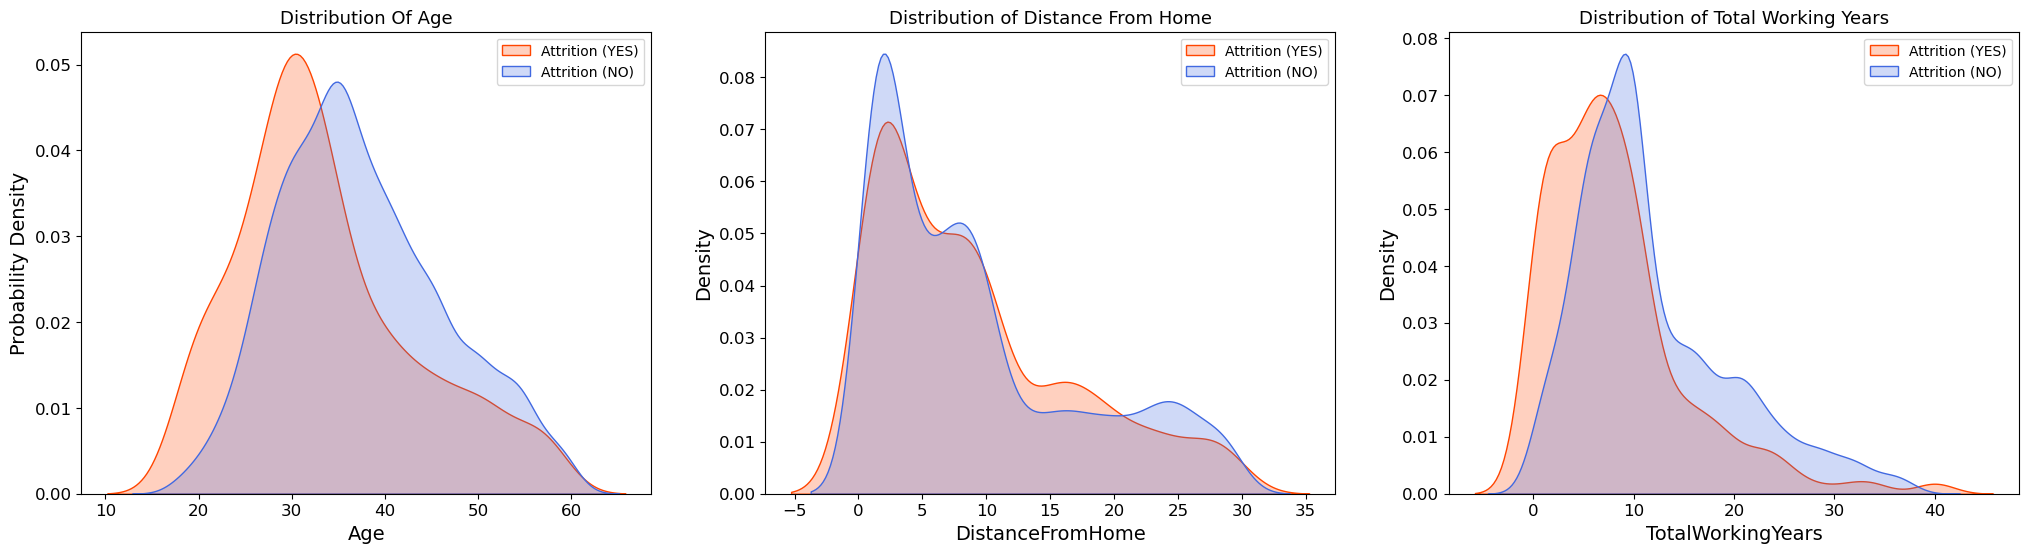

In [78]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.kdeplot(general_data['Age'][general_data.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(general_data['Age'][general_data.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution Of Age', fontsize=13)
plt.ylabel('Probability Density')
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,3,2)
sns.kdeplot(general_data['DistanceFromHome'][general_data.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(general_data['DistanceFromHome'][general_data.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of Distance From Home', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])

plt.subplot(1,3,3)
sns.kdeplot(general_data['TotalWorkingYears'][general_data.Attrition=='Yes'], shade=True, color='orangered')
sns.kdeplot(general_data['TotalWorkingYears'][general_data.Attrition=='No'], shade=True, color='royalblue')
plt.title('Distribution of Total Working Years', fontsize=13)
plt.legend(['Attrition (YES)','Attrition (NO)'])


plt.show()

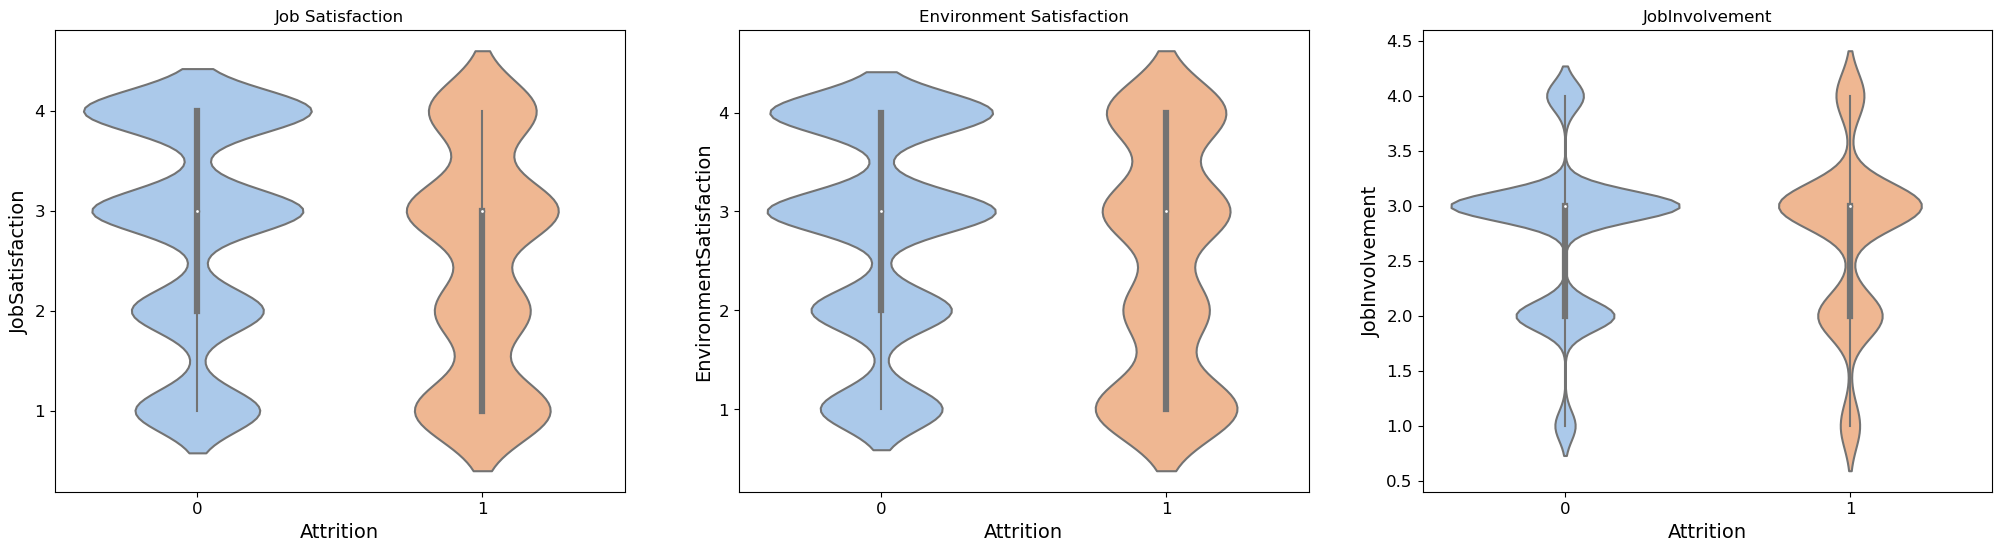

In [79]:
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.violinplot(data=Employee, x='Attrition', y='JobSatisfaction', palette='pastel')
plt.title('Job Satisfaction')

plt.subplot(1,3,2)
sns.violinplot(data=Employee, x='Attrition', y='EnvironmentSatisfaction', palette='pastel')
plt.title('Environment Satisfaction')

plt.subplot(1,3,3)
sns.violinplot(data=Employee, x='Attrition', y='JobInvolvement', palette='pastel')
plt.title('JobInvolvement')

plt.show()

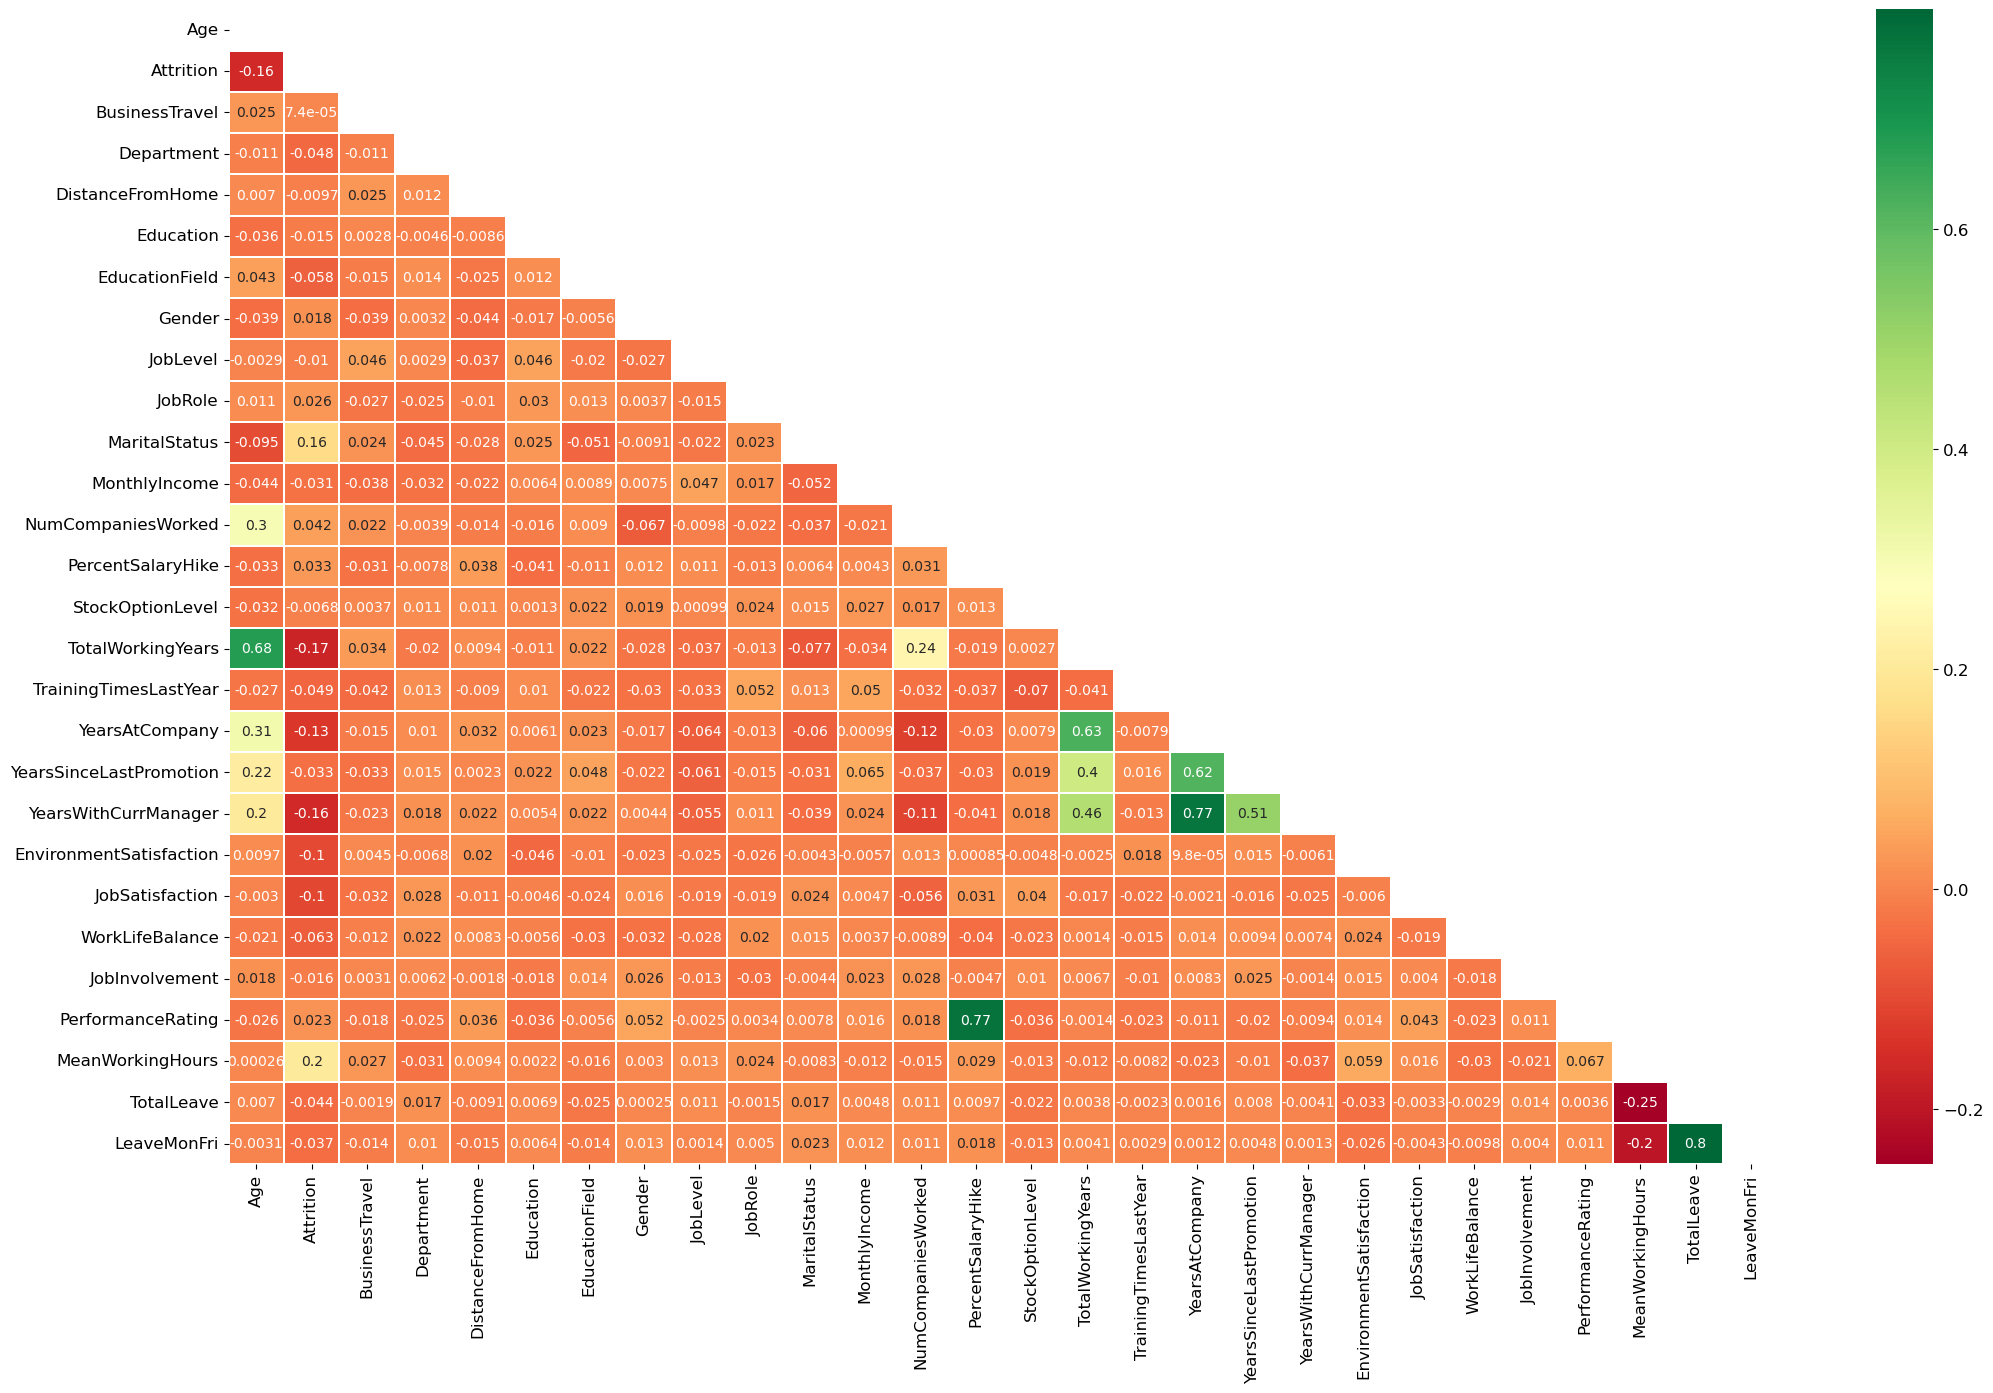

In [80]:
matrix = np.triu(Employee.corr())
plt.figure(figsize = (25, 15))
sns.heatmap(Employee.corr(), annot = True, linewidth = 0.02,cmap = 'RdYlGn', mask=matrix)
plt.show()

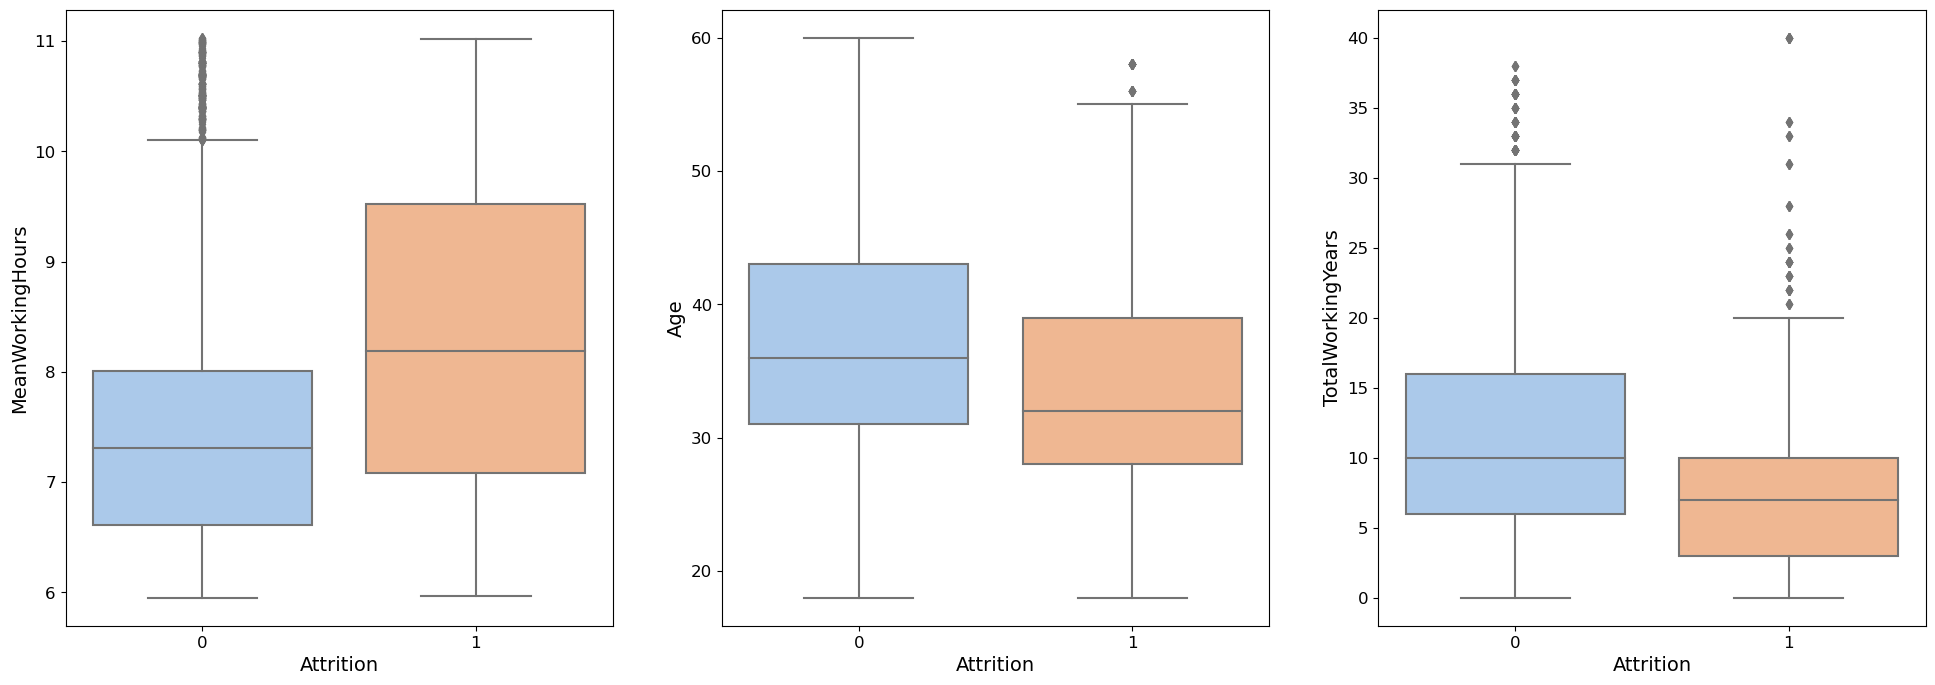

In [81]:
plt.figure(figsize=(24,8))
plt.subplot(1,3,1)
sns.boxplot(x='Attrition', y='MeanWorkingHours', data=Employee, palette='pastel');
plt.subplot(1,3,2)
sns.boxplot(x='Attrition', y='Age', data=Employee, palette='pastel');
plt.subplot(1,3,3)
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=Employee, palette='pastel');
plt.show()

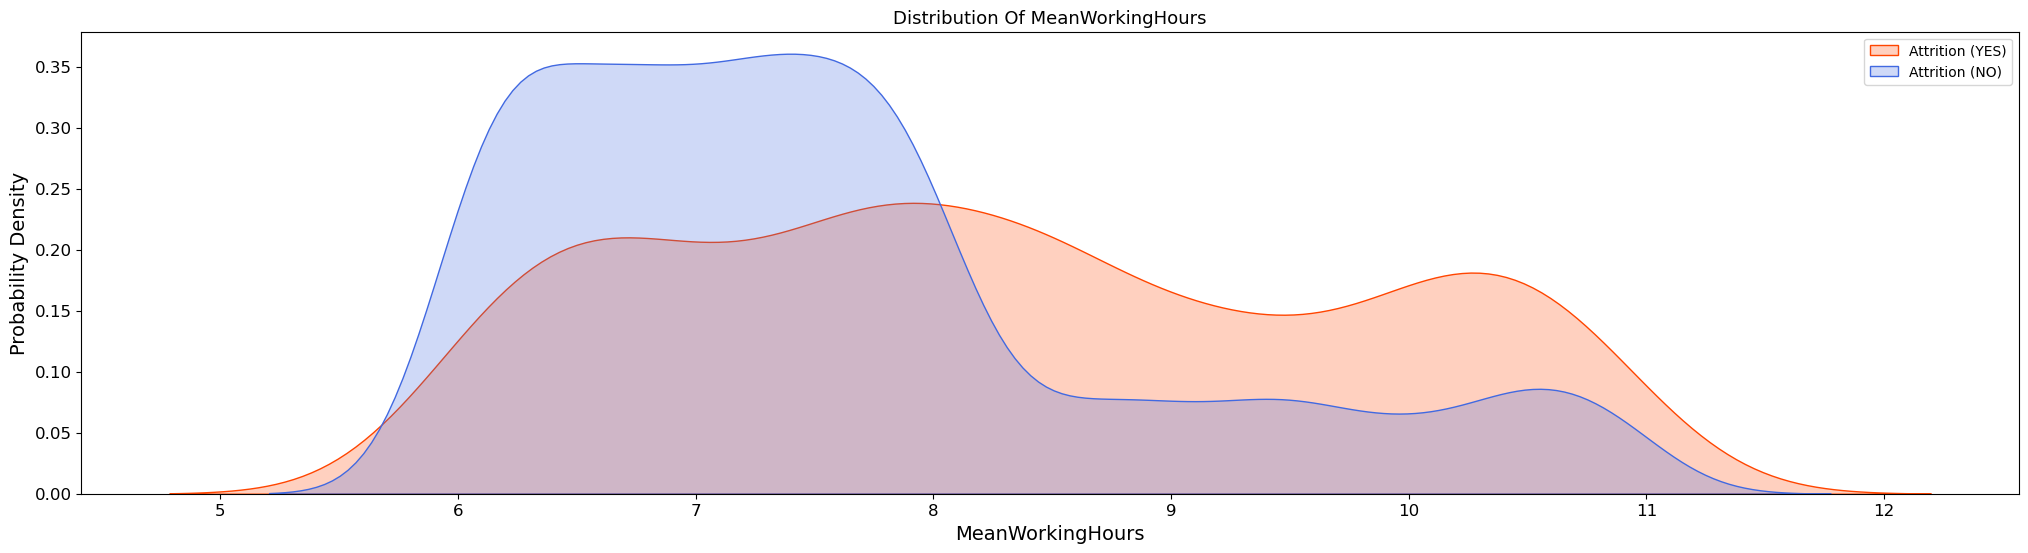

In [83]:
plt.figure(figsize=(25,6))
sns.kdeplot(general_data['MeanWorkingHours'][general_data.Attrition=='Yes'], shade=True, color='orangered');
sns.kdeplot(general_data['MeanWorkingHours'][general_data.Attrition=='No'], shade=True, color='royalblue');
plt.title('Distribution Of MeanWorkingHours', fontsize=13)
plt.ylabel('Probability Density')
plt.legend(['Attrition (YES)','Attrition (NO)']);

In [84]:
from sklearn.preprocessing import StandardScaler, Normalizer

In [85]:
scaler = StandardScaler()
scaler.fit(Employee)
Employee_scaled = scaler.transform(Employee)

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)
Employee_pca = pca.fit_transform(Employee_scaled)
Employee_pca.shape

(4410, 2)

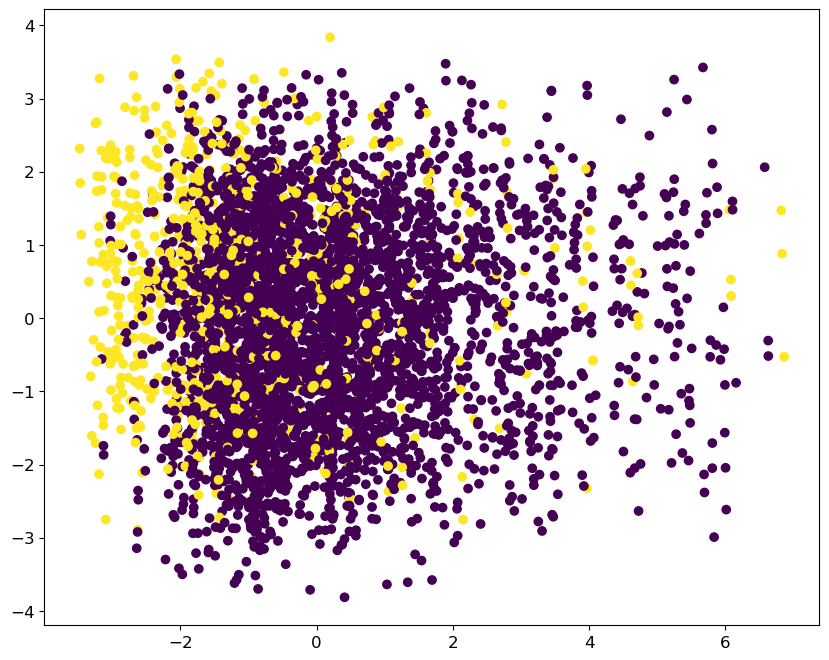

In [88]:
plt.figure(figsize=(10,8))

plt.scatter(Employee_pca[:,0],Employee_pca[:,1],c=Employee['Attrition']);

In [89]:
from sklearn.manifold import TSNE, Isomap

In [90]:
iso = Isomap(n_components=3, n_neighbors=20)
Employee_iso = iso.fit_transform(Employee_scaled)
Employee_scaled.shape

(4410, 28)

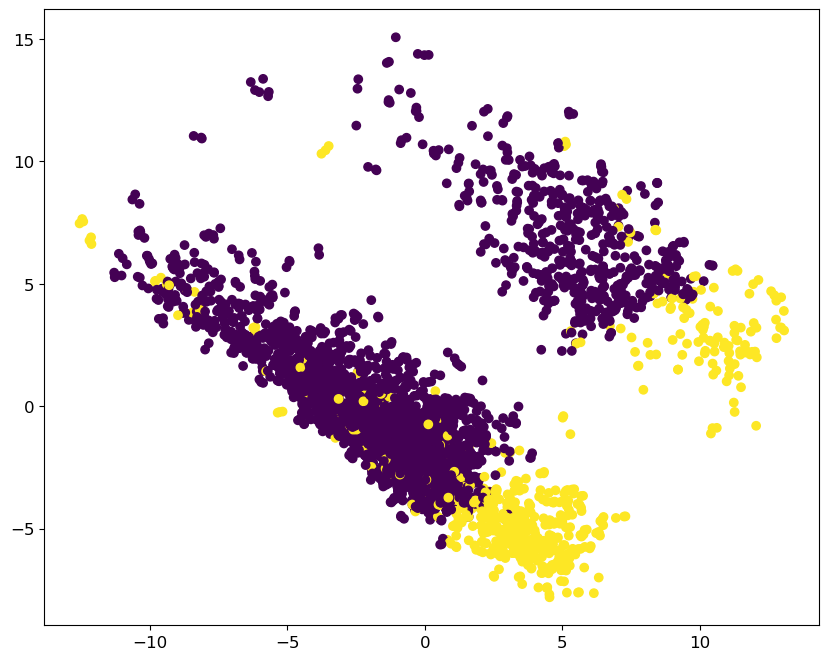

In [91]:
plt.figure(figsize=(10,8))
plt.scatter(Employee_iso[:,0],Employee_iso[:,1],c=Employee['Attrition']);

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
y = Employee['Attrition']
x = Employee.drop('Attrition', axis = 1)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [95]:
X_train_lr,X_test_lr, y_train_lr, y_test_lr = train_test_split(x,y, test_size = 0.20, random_state=39)

In [96]:
X_train_lr = scaler.fit_transform(X_train_lr)
X_test_lr = scaler.fit_transform(X_test_lr)
print(X_train_lr.shape,X_test_lr.shape)

(3528, 27) (882, 27)


In [97]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_lr,y_train_lr)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [98]:
yhat_LR = LR.predict(X_test_lr)
print(yhat_LR[0:5])
print(y_test_lr[0:5])

[0 0 0 0 1]
EmployeeID
3914    0
3889    0
1258    1
409     1
1395    1
Name: Attrition, dtype: int32


In [104]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [105]:
print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_test_lr,yhat_LR))
print("FI SCORE: ", f1_score(y_test_lr, yhat_LR, average='weighted') )
print("jaccard_similarity_score: ", jaccard_score(y_test_lr, yhat_LR)) 

LogisticRegression's Accuracy:  0.8480725623582767
FI SCORE:  0.806624760430086
jaccard_similarity_score:  0.13548387096774195


In [106]:
from sklearn.tree import DecisionTreeClassifier

In [107]:
X_train_dt,X_test_dt, y_train_dt, y_test_dt= train_test_split(x,y, test_size = 0.20, random_state=41)

In [108]:
X_train_dt = scaler.fit_transform(X_train_dt)
X_test_dt = scaler.fit_transform(X_test_dt)
print(X_train_dt.shape,X_test_dt.shape)

(3528, 27) (882, 27)


In [109]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 10)
DT.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [110]:
yhat_DT = DT.predict(X_test_dt)
print (yhat_DT [0:5])
print (y_test_dt [0:5])

[0 0 0 0 0]
EmployeeID
2832    0
2699    0
4397    0
2629    0
1025    0
Name: Attrition, dtype: int32


In [114]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test_dt,yhat_DT))
print("FI SCORE: ", f1_score(y_test_dt, yhat_DT, average='weighted') )
print("jaccard_similarity_score: ", jaccard_score(y_test_dt, yhat_DT)) 

DecisionTrees's Accuracy:  0.9444444444444444
FI SCORE:  0.9428504264948877
jaccard_similarity_score:  0.69375


In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
X_train_rf,X_test_rf, y_train_rf, y_test_rf= train_test_split(x,y, test_size = 0.20, random_state=41)

In [117]:
X_train_rf = scaler.fit_transform(X_train_rf)
X_test_rf = scaler.fit_transform(X_test_rf)
print(X_train_rf.shape,X_test_rf.shape)

(3528, 27) (882, 27)


In [118]:
RF = RandomForestClassifier()
RF.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [119]:
yhat_RF = RF.predict(X_test_rf)
print (yhat_RF [0:5])
print (y_test_rf [0:5])

[0 0 0 0 0]
EmployeeID
2832    0
2699    0
4397    0
2629    0
1025    0
Name: Attrition, dtype: int32


In [121]:
print("Random Forest's Accuracy: ", metrics.accuracy_score(y_test_rf,yhat_RF))
print("FI SCORE: ", f1_score(y_test_rf, yhat_RF, average='weighted') )
print("jaccard_similarity_score: ", jaccard_score(y_test_rf, yhat_RF)) 

Random Forest's Accuracy:  0.9784580498866213
FI SCORE:  0.9778399612939361
jaccard_similarity_score:  0.8689655172413793
